In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Downloads

C:\Users\hp\Downloads


In [3]:
df = pd.read_csv("Consumer_Complaints.csv")

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,1/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,1/19/2017,Closed with explanation,Yes,No,2296496
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,4/6/2018,Closed with explanation,Yes,NaN,2866101
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [6]:
from io import StringIO

col = ['Product','Consumer complaint narrative']

In [8]:
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Student loan,When my loan was switched over to Navient i wa...,0
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,1
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",2
13,Mortgage,The entire lending experience with Citizens Ba...,2
14,Credit reporting,My credit score has gone down XXXX points in t...,3


In [13]:
category_id_df

,Product,category_id
1,Student loan,0
2,Credit card or prepaid card,1
7,Mortgage,2
14,Credit reporting,3
16,"Credit reporting, credit repair services, or o...",4
46,Debt collection,5
101,Vehicle loan or lease,6
118,"Money transfer, virtual currency, or money ser...",7
120,Checking or savings account,8
312,"Payday loan, title loan, or personal loan",9


In [12]:
id_to_category

{0: 'Student loan',
 1: 'Credit card or prepaid card',
 2: 'Mortgage',
 3: 'Credit reporting',
 4: 'Credit reporting, credit repair services, or other personal consumer reports',
 5: 'Debt collection',
 6: 'Vehicle loan or lease',
 7: 'Money transfer, virtual currency, or money service',
 8: 'Checking or savings account',
 9: 'Payday loan, title loan, or personal loan',
 10: 'Consumer Loan',
 11: 'Bank account or service',
 12: 'Credit card',
 13: 'Money transfers',
 14: 'Prepaid card',
 15: 'Payday loan',
 16: 'Other financial service',
 17: 'Virtual currency'}

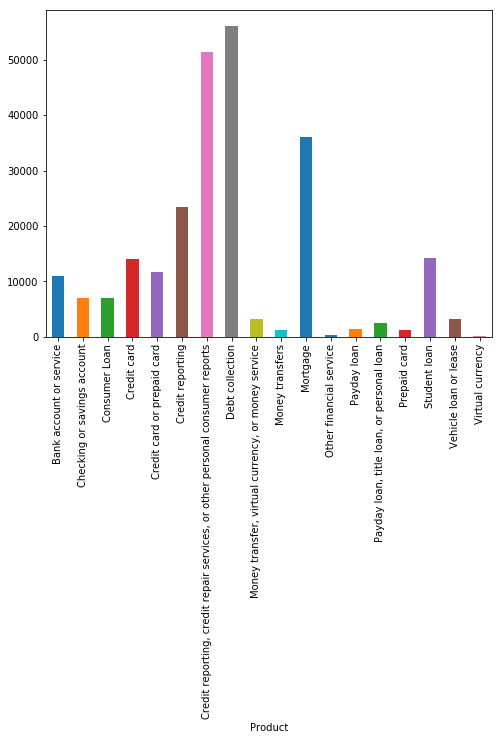

In [15]:

fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
labels = df.category_id
features.shape

(244302, 500120)

In [30]:
 from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print(" . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
 . Most correlated unigrams:
. bank
. overdraft
 . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
 . Most correlated unigrams:
. overdraft
. deposit
 . Most correlated bigrams:
. overdraft fees
. checking account
# 'Consumer Loan':
 . Most correlated unigrams:
. car
. vehicle
 . Most correlated bigrams:
. car loan
. auto loan
# 'Credit card':
 . Most correlated unigrams:
. macy
. card
 . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
 . Most correlated unigrams:
. express
. card
 . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
 . Most correlated unigrams:
. equifax
. experian
 . Most correlated bigrams:
. verify accounts
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
 . Most correlated unigrams:
. inquiries
. equifax
 . Most correlated bigrams:
. report understanding
. mistakes appear

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [32]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [33]:
Cs = [0.001, 0.01, 0.1, 1, 100, 1000 ]
for c in Cs:
    print(c)
    clf = LogisticRegression(C = c,random_state=0)
    clf.fit(X_train_tfidf, y_train)
    print(clf.score(X_test_tfidf, y_test))

0.001
0.4559237671098304
0.01
0.5971248935752178
0.1
0.6880444036937586
1
0.7275853035562251
100
0.7200373305390005
1000
0.6896489619490471


In [35]:
from sklearn.svm import LinearSVC

Cs = [0.001, 0.01, 0.1, 1, 100, 1000 ]
for c in Cs:
    print(c)
    clf1 = LinearSVC(C = c)
    clf1.fit(X_train_tfidf, y_train)
    print(clf1.score(X_test_tfidf, y_test))

0.001
0.6187045648045059
0.01
0.6925633636780405
0.1
0.7266684131246316
1
0.7327100661470954
100
0.6776147750343834
1000
0.646178531665466


In [36]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']
